In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]

In [15]:
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, bias = hidden1.get_weights()

In [18]:
weights

array([[-0.03244488, -0.03778819, -0.01089472, ..., -0.03858053,
         0.06583519,  0.06534337],
       [ 0.02185779,  0.06632744, -0.04657338, ..., -0.00491697,
         0.01282611,  0.03712263],
       [ 0.04334637,  0.02937549,  0.05185339, ...,  0.04013354,
        -0.06152181, -0.05599195],
       ...,
       [-0.00187157,  0.07288444, -0.04493101, ..., -0.00594137,
        -0.00585967, -0.03156584],
       [-0.06356378,  0.00293778, -0.0042894 , ...,  0.05201913,
        -0.06142487,  0.0316269 ],
       [-0.03634701,  0.0346593 , -0.05380281, ..., -0.01498029,
         0.05545434,  0.05003921]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
bias.shape

(300,)

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7082 - accuracy: 0.7703 - val_loss: 0.4942 - val_accuracy: 0.8374
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4865 - accuracy: 0.8307 - val_loss: 0.4452 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4440 - accuracy: 0.8447 - val_loss: 0.4114 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4145 - accuracy: 0.8561 - val_loss: 0.4050 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3965 - accuracy: 0.8612 - val_loss: 0.4042 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3800 - accuracy: 0.8662 - val_loss: 0.3743 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3667 - accuracy: 0.8711 - val_loss: 0.3657 - val_accurac

In [24]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [25]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [26]:
history.history

{'accuracy': [0.7703454494476318,
  0.8306909203529358,
  0.8446545600891113,
  0.856145441532135,
  0.8611999750137329,
  0.8661817908287048,
  0.8710545301437378,
  0.8748727440834045,
  0.8792909383773804,
  0.8811454772949219,
  0.883545458316803,
  0.8852909207344055,
  0.8878727555274963,
  0.8905454277992249,
  0.892054557800293,
  0.8945090770721436,
  0.897563636302948,
  0.8988000154495239,
  0.9006909132003784,
  0.9026181697845459,
  0.9054363369941711,
  0.9050182104110718,
  0.907945454120636,
  0.9092181921005249,
  0.9105454683303833,
  0.9128727316856384,
  0.9143999814987183,
  0.9167454838752747,
  0.9172909259796143,
  0.918218195438385],
 'loss': [0.7081995010375977,
  0.48646584153175354,
  0.4440484344959259,
  0.41449689865112305,
  0.396472692489624,
  0.3799839913845062,
  0.3666674494743347,
  0.3547927141189575,
  0.34482574462890625,
  0.3348604440689087,
  0.3270632326602936,
  0.3192964792251587,
  0.31130388379096985,
  0.3040444552898407,
  0.2983715236

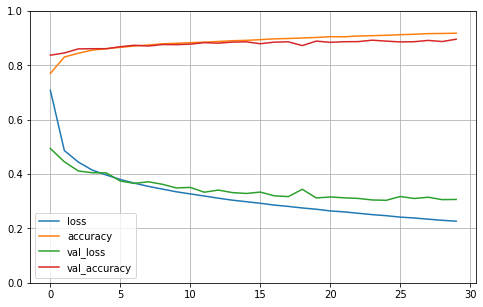

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 71.9713 - accuracy: 0.8369


[71.97127532958984, 0.836899995803833]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
model = keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid ))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8210 - val_loss: 1.8738
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 2.9626 - val_loss: 0.6833
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6445 - val_loss: 6.8583
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 25.5337 - val_loss: 0.5064
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5156 - val_loss: 0.4520
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4711 - val_loss: 0.4311
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.4218
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.4172
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7066 - val_loss: 0.4302
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4585 - val_loss: 0.448

In [38]:
y_pred

array([[1.4524022],
       [0.9632637],
       [1.2762393]], dtype=float32)

In [39]:
y_new = y_test[:3]
y_new

array([0.854, 0.955, 3.5  ])

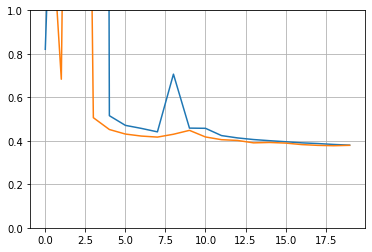

In [41]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

In [44]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30,activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units,activation=activation)
    self.hidden2 = keras.layers.Dense(units,activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self,inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

In [45]:
import os
root_logdir = os.path.join(os.curdir,'my_logs')

def get_run_logdir():
  import time
  run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [49]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [50]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [51]:
keras_reg.fit(X_train,y_train,epochs=100,validation_data=([X_valid,y_valid]),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3845 - val_loss: 0.6473
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6514 - val_loss: 0.5647
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5690 - val_loss: 0.5220
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5356 - val_loss: 0.4956
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4779
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4977 - val_loss: 0.4646
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4865 - val_loss: 0.4558
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4779 - val_loss: 0.4513
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4718 - val_loss: 0.4450
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4670 - val_lo

In [52]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3719


In [55]:
mse_test

-0.3718951642513275

In [53]:
y_pred = keras_reg.predict(X_new)

In [54]:
y_pred

array([1.5399457, 1.1337218, 1.0555598], dtype=float32)

In [56]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden':[0,1,2,3],
    'n_neurons':np.arange(1,100),
    'learning_rate':reciprocal(3e-4,3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 2s 5ms/step - loss: 1.0353 - val_loss: 0.6386
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6154 - val_loss: 0.5527
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5483 - val_loss: 0.4973
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5111 - val_loss: 0.4678
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4899 - val_loss: 0.4538
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4796 - val_loss: 0.4440
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4647 - val_loss: 0.4324
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4577 - val_loss: 0.4251
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4510 - val_loss: 0.4266
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4453 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0950 - val_loss: 1.5912
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 3.2827 - val_loss: 0.6767
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8214 - val_loss: 1.4653
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 2.5120 - val_loss: 0.5358
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5015 - val_loss: 0.4724
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4612 - val_loss: 0.4490
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4393 - val_loss: 0.4327
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4265 - val_loss: 0.4244
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4176 - val_loss: 0.4173
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4099 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0048 - val_loss: 0.6421
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8253 - val_loss: 0.5378
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5524 - val_loss: 0.4932
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5078 - val_loss: 0.4642
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4953 - val_loss: 0.4526
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4760 - val_loss: 0.4411
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4623 - val_loss: 0.4324
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4536 - val_loss: 0.4269
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4462 - val_loss: 0.4257
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4418 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.6745 - val_loss: 2.2235
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4698 - val_loss: 1.2088
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9405 - val_loss: 0.9151
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7881 - val_loss: 0.7963
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7304 - val_loss: 0.7343
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6986 - val_loss: 0.6941
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6754 - val_loss: 0.6640
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6566 - val_loss: 0.6393
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6431 - val_loss: 0.6236
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6303 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 3.8732 - val_loss: 1.7355
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1806 - val_loss: 0.8017
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6911 - val_loss: 0.5945
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5783 - val_loss: 0.5441
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5490 - val_loss: 0.5294
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5394 - val_loss: 0.5237
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5348 - val_loss: 0.5197
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5319 - val_loss: 0.5167
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5294 - val_loss: 0.5150
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5275 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 3.8062 - val_loss: 1.5074
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0819 - val_loss: 0.7618
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6958 - val_loss: 0.6023
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6098 - val_loss: 0.5643
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5863 - val_loss: 0.5517
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5785 - val_loss: 0.5467
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5729 - val_loss: 0.5425
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5680 - val_loss: 0.5373
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5654 - val_loss: 0.5340
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5617 - val_loss: 0.5315
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.6512 - val_loss: 1.1921
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0126 - val_loss: 0.9140
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8537 - val_loss: 0.8278
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7960 - val_loss: 0.7737
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7592 - val_loss: 0.7353
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7311 - val_loss: 0.7047
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7080 - val_loss: 0.6794
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6878 - val_loss: 0.6583
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6699 - val_loss: 0.6390
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6537 - val_loss: 0.6220
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 3.1334 - val_loss: 1.5148
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3837 - val_loss: 0.9588
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8951 - val_loss: 0.8107
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7798 - val_loss: 0.7379
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7268 - val_loss: 0.6974
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6943 - val_loss: 0.6697
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6711 - val_loss: 0.6484
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6513 - val_loss: 0.6296
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6335 - val_loss: 0.6135
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6174 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.9822 - val_loss: 1.3850
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2126 - val_loss: 0.8789
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8563 - val_loss: 0.7536
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7567 - val_loss: 0.6921
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7070 - val_loss: 0.6545
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6745 - val_loss: 0.6281
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6510 - val_loss: 0.6071
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6321 - val_loss: 0.5910
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6160 - val_loss: 0.5765
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6018 - val_loss: 0.5640
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.5138 - val_loss: 2.6543
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.0016 - val_loss: 1.4525
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2323 - val_loss: 1.0380
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9548 - val_loss: 0.8799
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8448 - val_loss: 0.8075
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7948 - val_loss: 0.7686
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7674 - val_loss: 0.7434
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7494 - val_loss: 0.7252
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7357 - val_loss: 0.7105
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7242 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.8856 - val_loss: 2.3498
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7939 - val_loss: 1.2708
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1247 - val_loss: 0.9136
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8707 - val_loss: 0.7684
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7615 - val_loss: 0.7049
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7071 - val_loss: 0.6696
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6754 - val_loss: 0.6467
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6541 - val_loss: 0.6300
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6380 - val_loss: 0.6165
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6251 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 2s 3ms/step - loss: 3.0637 - val_loss: 1.8217
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4829 - val_loss: 1.1363
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0622 - val_loss: 0.9366
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9265 - val_loss: 0.8640
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8707 - val_loss: 0.8279
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8404 - val_loss: 0.8033
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8178 - val_loss: 0.7840
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7999 - val_loss: 0.7680
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7842 - val_loss: 0.7538
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7703 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9734 - val_loss: 0.9551
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8027 - val_loss: 0.7428
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6996 - val_loss: 0.6542
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6427 - val_loss: 0.6004
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6035 - val_loss: 0.5664
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5758 - val_loss: 0.5402
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5547 - val_loss: 0.5230
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5394 - val_loss: 0.5082
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5284 - val_loss: 0.4974
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5183 - val_loss: 0.4885
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.0859 - val_loss: 0.8678
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8277 - val_loss: 0.7609
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7423 - val_loss: 0.6983
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6952 - val_loss: 0.6582
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6564 - val_loss: 0.6237
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6262 - val_loss: 0.5982
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6004 - val_loss: 0.5738
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5785 - val_loss: 0.5542
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5602 - val_loss: 0.5379
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5444 - val_loss: 0.5242
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 2.1824 - val_loss: 0.9776
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9599 - val_loss: 0.8029
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7861 - val_loss: 0.7189
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7264 - val_loss: 0.6813
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6840 - val_loss: 0.6481
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6541 - val_loss: 0.6221
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6306 - val_loss: 0.6006
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6111 - val_loss: 0.5807
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5936 - val_loss: 0.5621
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5789 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9138 - val_loss: 0.8725
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8037 - val_loss: 0.7434
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7287 - val_loss: 0.6867
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6845 - val_loss: 0.6481
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6520 - val_loss: 0.6172
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6257 - val_loss: 0.5920
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6030 - val_loss: 0.5718
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5838 - val_loss: 0.5527
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5666 - val_loss: 0.5372
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5518 - val_loss: 0.5216
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9068 - val_loss: 0.7327
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6814 - val_loss: 0.6218
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6205 - val_loss: 0.5874
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5880 - val_loss: 0.5630
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5633 - val_loss: 0.5403
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5434 - val_loss: 0.5248
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5271 - val_loss: 0.5106
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5128 - val_loss: 0.4984
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5008 - val_loss: 0.4873
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4905 - val_loss: 0.4777
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9648 - val_loss: 0.7214
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7032 - val_loss: 0.6319
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6483 - val_loss: 0.5969
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6171 - val_loss: 0.5713
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5902 - val_loss: 0.5485
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5675 - val_loss: 0.5291
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5466 - val_loss: 0.5088
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5274 - val_loss: 0.4960
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5115 - val_loss: 0.4807
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4972 - val_loss: 0.4705
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0771 - val_loss: 0.6813
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6615 - val_loss: 0.5853
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5890 - val_loss: 0.5330
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5475 - val_loss: 0.4994
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5179 - val_loss: 0.4814
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4989 - val_loss: 0.4631
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4877 - val_loss: 0.4567
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4767 - val_loss: 0.4494
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4681 - val_loss: 0.4480
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4618 - val_loss: 0.4385
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0877 - val_loss: 0.9130
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5230 - val_loss: 2.3698
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 5.2371 - val_loss: 0.6891
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7565 - val_loss: 0.4790
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.4519
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4186 - val_loss: 0.4281
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4061 - val_loss: 0.4152
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3976 - val_loss: 0.4084
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3892 - val_loss: 0.3985
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3811 - val_loss: 0.3949
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.1827 - val_loss: 0.7332
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6264 - val_loss: 0.5412
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5362 - val_loss: 0.4858
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4957 - val_loss: 0.4577
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4749 - val_loss: 0.4447
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4587 - val_loss: 0.4435
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4496 - val_loss: 0.4302
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4436 - val_loss: 0.4203
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4331 - val_loss: 0.4169
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4330 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9789 - val_loss: 0.5464
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5537 - val_loss: 0.5213
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5205 - val_loss: 0.4699
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5050 - val_loss: 0.4568
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4689 - val_loss: 0.4366
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4686 - val_loss: 0.4317
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4618 - val_loss: 0.4594
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4776 - val_loss: 0.4344
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4674 - val_loss: 0.4023
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4351 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.9650 - val_loss: 4.2775
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 131.1784 - val_loss: 1.4772
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6988 - val_loss: 0.4923
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4820 - val_loss: 0.4440
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4475 - val_loss: 0.4308
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4321 - val_loss: 0.4185
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4202 - val_loss: 0.4121
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4134 - val_loss: 0.4034
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4057 - val_loss: 0.3951
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.3925

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



242/242 [==============================] - 1s 3ms/step - loss: 0.9010 - val_loss: 1.1058
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7962 - val_loss: 0.4781
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4914 - val_loss: 0.4503
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4788 - val_loss: 0.4357
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4643 - val_loss: 0.4292
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4483 - val_loss: 0.4258
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4568 - val_loss: 0.4146
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4300 - val_loss: 0.4118
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4239 - val_loss: 0.4031
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4212 - val_loss: 0.4023


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.0247 - val_loss: 1.4488
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1209 - val_loss: 0.9462
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8673 - val_loss: 0.8098
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7740 - val_loss: 0.7401
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7261 - val_loss: 0.6985
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6959 - val_loss: 0.6695
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6735 - val_loss: 0.6462
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6546 - val_loss: 0.6275
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6393 - val_loss: 0.6121
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6259 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.8234 - val_loss: 1.2939
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1764 - val_loss: 0.8816
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8200 - val_loss: 0.7388
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7252 - val_loss: 0.6838
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6829 - val_loss: 0.6509
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6558 - val_loss: 0.6275
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6353 - val_loss: 0.6082
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6166 - val_loss: 0.5916
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6004 - val_loss: 0.5763
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5858 - val_loss: 0.5632
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.0232 - val_loss: 1.4783
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.2194 - val_loss: 0.9224
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8827 - val_loss: 0.7633
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7564 - val_loss: 0.6917
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7017 - val_loss: 0.6560
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6725 - val_loss: 0.6339
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6529 - val_loss: 0.6171
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6369 - val_loss: 0.6032
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6236 - val_loss: 0.5905
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6113 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9631 - val_loss: 0.6352
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5441 - val_loss: 0.4547
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4763 - val_loss: 0.4500
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4613 - val_loss: 0.4330
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4790 - val_loss: 0.4400
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4569 - val_loss: 0.4282
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4451 - val_loss: 0.4118
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4366 - val_loss: 0.4154
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4309 - val_loss: 0.4185
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4244 - val_lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9526 - val_loss: 2.8239
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [=====================

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8930 - val_loss: 1.0583
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [==============================] -

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-0.33275277 -0.52627593 -0.39076923 -0.47545601 -0.40369433 -0.34330928
 -0.38255167 -0.33962367 -0.40035416         nan]
  category=UserWarning,


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8968 - val_loss: 0.7021
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7495 - val_loss: 0.5461
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5258 - val_loss: 0.4683
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4512
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4689 - val_loss: 0.4395
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4546 - val_loss: 0.4295
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4454 - val_loss: 0.4225
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 0.4142
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4319 - val_loss: 0.4112
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4252 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5640da7710>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5640c7cd90>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [57]:
rnd_search_cv.best_params_

{'learning_rate': 0.006127639511020751, 'n_hidden': 1, 'n_neurons': 81}

In [58]:
rnd_search_cv.best_score_

-0.3327527741591136

In [59]:
model = rnd_search_cv.best_estimator_.model

In [60]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3608


0.36077362298965454